In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/HackerEarth Power Generated Challenge /train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/HackerEarth Power Generated Challenge /test.csv')

In [ ]:
train_df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [ ]:
test_df

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,42.128526,509.795489,1798.141681,-14.365696,NaN,Medium,3.286975,0.407771,20.888674
12082,WM_1630,2018-11-12 17:33:20,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,47.353528,345.705839,1680.245230,-7.062661,AB,Low,NaN,0.367823,24.793606
12083,WM_24703,2019-05-27 11:53:20,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,41.768478,205.569627,2343.165194,12.331790,BA,Low,3.728375,0.459887,5.653451
12084,WM_22893,2019-05-13 21:53:20,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,82.750271,260.578999,1732.883672,NaN,A,Medium,2.247676,0.394680,24.591364


In [ ]:
train_df.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [ ]:
#Replacing low, medium, extremely low in cloud level column with their one hot encoded values

train_df['cloud_level'] = train_df['cloud_level'].replace({'Low' : 0 , 'Medium' : 1, 'Extremely Low' : -1})

In [ ]:
#Doing the same as above for test set

test_df['cloud_level'] = test_df['cloud_level'].replace({'Low' : 0 , 'Medium' : 1, 'Extremely Low' : -1})

In [ ]:
#Replacing the various text described values in the column turbine_status with their one hot encode values
onehotencods = {}
for i in range(len(train_df['turbine_status'].unique())):
  onehotencods[train_df['turbine_status'].unique()[i]] = i
  train_df['turbine_status'].replace({train_df['turbine_status'].unique()[i] : i}, inplace = True)

In [ ]:
onehotencods

{'A': 13,
 'A2': 1,
 'AAA': 3,
 'AB': 9,
 'ABC': 2,
 'AC': 5,
 'B': 8,
 'B2': 11,
 'BA': 0,
 'BB': 6,
 'BBB': 12,
 'BCB': 7,
 'BD': 4,
 'D': 14,
 nan: 10}

In [ ]:
#Applying these one hot encoded numbers in test dataset 
test_df['turbine_status'].replace(onehotencods, inplace = True)

print(test_df['turbine_status'].value_counts())

6     871
11    859
13    852
12    813
7     811
0     809
9     804
10    797
1     796
4     787
2     787
14    786
5     778
3     773
8     763
Name: turbine_status, dtype: int64


In [ ]:
#Replace the nan values in the train dataset by corresponding median values of the column

for i in range(len(train_df.describe().columns)):
  train_df.iloc[:,i+2].replace(np.NAN,train_df.iloc[:,i+2].median(),inplace = True)

In [ ]:
train_df.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,2.820000e+04,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000
mean,69.271978,2.306757,40.085642,-9.583888,41.027833,42.614626,1711.093020,65.030283,4.982589e+04,32.735091,22.642152,300.471910,1575.563653,25.994462,7.013617,0.475355,2.470631,0.397249,25.888413,6.127844
std,75.942703,41.800134,27.203482,47.740964,43.662833,6.123271,826.906441,19.812632,1.785746e+05,7.703391,52.384616,122.087135,483.318211,32.109132,4.321050,0.520200,10.217120,0.061158,7.698407,2.687783
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,0.000000,-1.000000,-99.000000,0.200111,-30.295253,0.962305
25%,21.250907,9.383737,41.633671,-1.194486,40.557993,41.911899,870.621152,41.200625,1.689269e+04,27.311644,40.851429,246.793261,1268.141402,13.829618,3.000000,0.000000,2.735787,0.347445,24.469380,4.076167
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,7.000000,0.000000,3.453333,0.398591,25.957739,5.764710
75%,95.248020,22.575311,45.673234,5.370015,45.879212,45.173397,2462.164052,78.939478,1.164252e+05,38.232387,44.325305,332.325695,1829.044723,41.337104,11.000000,1.000000,4.156647,0.449354,27.451080,7.931295
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,14.000000,1.000000,18.209800,0.499975,78.351335,20.175358


In [ ]:
#Doing the same for the test set 
for i in range(len(test_df.describe().columns)):
  test_df.iloc[:,i+2].replace(np.NAN,test_df.iloc[:,i+2].median(),inplace = True)

In [ ]:
test_df.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
count,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,1.208600e+04,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000
mean,69.631612,2.516327,39.936883,-9.142018,40.318879,42.605130,1717.630633,65.240194,5.084710e+04,32.796157,22.583009,301.883520,1581.289398,26.718264,7.051547,0.476336,2.416996,0.397527,25.963460
std,75.760720,41.669548,27.113399,47.372244,42.480072,6.213868,829.485837,19.864346,1.784305e+05,7.671602,51.538676,122.161796,483.125121,31.743622,4.322353,0.521505,10.468374,0.061661,7.634223
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,0.000000,-1.000000,-99.000000,0.200009,-21.215639
25%,22.168108,9.435549,41.635721,-1.188679,40.460385,41.926556,874.600120,41.285062,1.690488e+04,27.407281,40.774240,247.242960,1272.310773,13.886059,3.000000,0.000000,2.702952,0.346909,24.490326
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,7.000000,0.000000,3.434327,0.399637,25.950314
75%,95.228791,22.744798,45.755861,6.028020,45.840069,45.227942,2479.582123,79.427893,1.164036e+05,38.302580,44.355803,335.347247,1837.302026,41.759021,11.000000,1.000000,4.156727,0.450488,27.458013
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,14.000000,1.000000,17.847936,0.499985,77.604969


In [ ]:
#Shuffling the indices 
np.random.seed(10)
n_dev = 3200 #Data for dev set
shuffled_indices = np.random.permutation(train_df.shape[0])

In [ ]:
#Load the train data into numpy arrays
x = np.array(train_df.loc[:,'wind_speed(m/s)':'windmill_height(m)'])
y = np.array(train_df['windmill_generated_power(kW/h)'])

In [ ]:
#Make train and dev sets
x_train = x[shuffled_indices[n_dev:]]
y_train = y[shuffled_indices[n_dev:]]

x_dev = x[shuffled_indices[:n_dev]]
y_dev = y[shuffled_indices[:n_dev]]

In [ ]:
x_train.shape

(25000, 19)

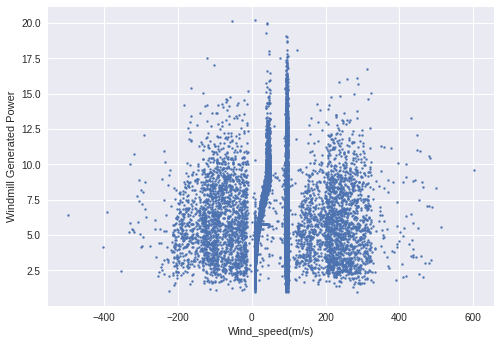

In [ ]:
#Plot the graph between various features and Wind power values 

plt.style.use('seaborn')
plt.xlabel('Wind_speed(m/s)')
plt.ylabel('Windmill Generated Power')
plt.scatter(train_df['wind_speed(m/s)'],train_df['windmill_generated_power(kW/h)'], s = 4)

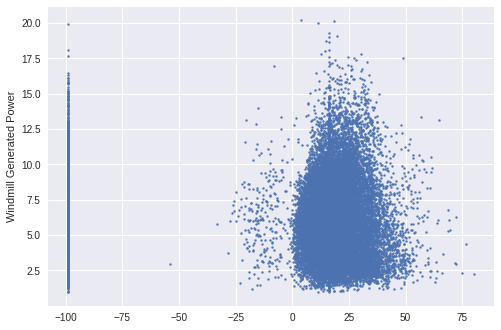

In [ ]:
plt.style.use('seaborn')
plt.xlabel('')
plt.ylabel('Windmill Generated Power')
plt.scatter(train_df['atmospheric_temperature(°C)'],train_df['windmill_generated_power(kW/h)'], s = 4)

In [ ]:
#Reshape y_train
y_train = y_train.reshape(-1,1)
y_dev = y_dev.reshape(-1,1)

In [ ]:
#Load the test data into numpy arrays
x_test = np.array(test_df.loc[:,'wind_speed(m/s)':'windmill_height(m)'])

In [ ]:
#Normalizing the data now
x_train = (x_train - x_train.mean(axis = 0))/x_train.std(axis = 0)
x_dev = (x_dev - x_dev.mean(axis = 0))/ x_dev.std(axis = 0)
x_test = (x_test - x_test.mean(axis = 0))/x_test.std(axis = 0)

In [ ]:
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader, Dataset

In [ ]:
#Making the input data a Pytorch Dataset
class PowerDataset(Dataset):
  def __init__(self,x,y):
    x = x.astype(np.float32)
    y = y.astype(np.float32)
    #Make the input data a torch tensor
    self.x = torch.from_numpy(x)
    self.y = torch.from_numpy(y)

  def __getitem__(self,index):
    return self.x[index],self.y[index]

  def __len__(self):
    return self.x.shape[0]

In [ ]:
train_dataset = PowerDataset(x_train, y_train)
dev_dataset = PowerDataset(x_dev , y_dev)

In [ ]:
train_dataset[0]

(tensor([ 0.3159, -2.4138,  0.0095,  1.6894, -0.0499, -0.1811, -0.8036,  0.0404,
         -0.1848, -0.1521,  0.3842,  1.7560,  0.1905, -0.1727,  1.6161, -0.9105,
          0.2147, -1.1635,  1.3555]), tensor([2.8224]))

In [ ]:
#Make the model now
class PowerPredictor(nn.Module):
  def __init__(self,input_features,num_outputs,neuronslist):
    super().__init__()
    self.input_features = input_features
    self.num_outputs = num_outputs
    self.neuronslist = neuronslist
    '''Here,
    input_features : Number of different features in dataset
    num_outputs : Number of outputs
    neuronslist : List of number of hidden units per layer 
                  (Since there are three layers so there will be three elements in this list'''

            
    self.linear1 = nn.Linear(self.input_features,self.neuronslist[0])
    self.act1 = nn.Softplus()

    self.linear3 = nn.Linear(self.neuronslist[0], self.neuronslist[1])
    self.act3 = nn.Softplus()

    self.linear6 = nn.Linear(self.neuronslist[1], self.num_outputs)
    self.act6 = nn.Softplus()

  def forward(self,x):
    out = self.act1(self.linear1(x))
    #out = self.act2(self.linear2(out))
    out = self.act3(self.linear3(out))
    #out = self.act4(self.linear4(out))
    #out = self.act5(self.linear5(out))
    out = self.act6(self.linear6(out))
    return out

In [ ]:
model = PowerPredictor(input_features=19,num_outputs=1,neuronslist=[16,8])
model.to('cuda')

PowerPredictor(
  (linear1): Linear(in_features=19, out_features=16, bias=True)
  (act1): Softplus(beta=1, threshold=20)
  (linear3): Linear(in_features=16, out_features=8, bias=True)
  (act3): Softplus(beta=1, threshold=20)
  (linear6): Linear(in_features=8, out_features=1, bias=True)
  (act6): Softplus(beta=1, threshold=20)
)

In [ ]:
#model.load_state_dict(torch.load('/content/drive/MyDrive/HackerEarth Power Generated Challenge /PowerPredictionWeights.pt'))

In [ ]:
#Making the data loaders now
batch_size = 256
train_loader = DataLoader(train_dataset,batch_size)
dev_loader = DataLoader(dev_dataset, batch_size)

In [ ]:
#Define the loss function
loss_fn = nn.MSELoss() #The loss defined for the problem question is 100 multiplied by the mse loss that it will be incorporated later

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr = (1e-3))

In [ ]:
model.train()
num_epochs = 500
iters = []
loss_per_epoch = []
for epochs in range(1,num_epochs+1):
  loss_epoch = 0.0
  for inputs, outputs in train_loader:
    inputs , outputs = inputs.to('cuda'), outputs.to('cuda')
    preds = model(inputs)
    loss = loss_fn(preds.view(-1),outputs.view(-1))
    loss.backward()
    opt.step()
    opt.zero_grad()
    loss_epoch += loss
  loss_per_epoch.append(loss_epoch)
  iters.append(epochs)
  if epochs % 5 == 0 :
    print("[{}/{}] Loss : {}".format(epochs,num_epochs,loss_epoch))

[5/500] Loss : 480.5413818359375
[10/500] Loss : 442.5589599609375
[15/500] Loss : 422.79779052734375
[20/500] Loss : 405.40557861328125
[25/500] Loss : 387.23675537109375
[30/500] Loss : 367.83880615234375
[35/500] Loss : 347.6612243652344
[40/500] Loss : 327.0813293457031


KeyboardInterrupt: ignored

In [ ]:
#Checking the loss on dev set
model.eval()
loss_dev = 0.0
for inputs_dev , outputs_dev in dev_loader:
  inputs_dev , outputs_dev  = inputs_dev.to('cuda'), outputs_dev.to('cuda')
  preds_dev = model(inputs)
  loss = loss_fn(preds_dev.view(-1),outputs.view(-1))
  loss_dev += loss
print("Loss on dev set : {}".format(loss_dev))

Loss on dev set : 4.178446292877197


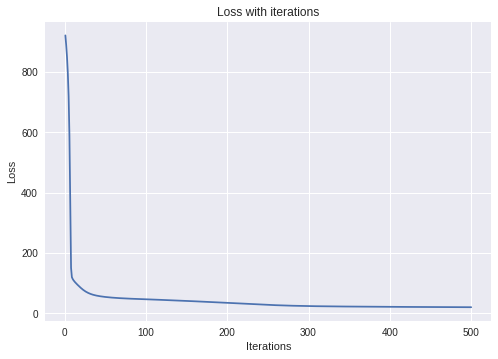

In [ ]:
#Plot the graph of loss with iterations
plt.title('Loss with iterations')
plt.style.use('seaborn')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(iters,loss_per_epoch)

In [ ]:
#Save the model
PATH = '/content/drive/MyDrive/HackerEarth Power Generated Challenge /PowerPredictionWeightsOneSoftplus.pt'
torch.save(model.state_dict(),PATH)

In [ ]:
#Preparing the test data
x_test = x_test.astype(np.float32)
x_test = torch.from_numpy(x_test)
x_test = x_test.to('cuda')

In [ ]:
#Evaluate the model on test dataset
model.eval()
preds_test = model(x_test)

In [ ]:
preds_test.shape

torch.Size([12086, 1])

In [ ]:
preds_test_df = test_df.loc[:,'tracking_id':'datetime']

In [ ]:
preds_test_df['windmill_generated_power(kW/h)'] = preds_test.cpu().detach().numpy()

In [ ]:
preds_test_df.describe()

,windmill_generated_power(kW/h)
count,12086.000000
mean,6.073948
std,2.520210
min,1.575597
25%,4.291989
50%,5.457126
75%,8.073662
max,13.795196


In [ ]:
train_df.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,2.820000e+04,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000,28200.000000
mean,69.271978,2.306757,40.085642,-9.583888,41.027833,42.614626,1711.093020,65.030283,4.982589e+04,32.735091,22.642152,300.471910,1575.563653,25.994462,7.013617,0.475355,2.470631,0.397249,25.888413,6.127844
std,75.942703,41.800134,27.203482,47.740964,43.662833,6.123271,826.906441,19.812632,1.785746e+05,7.703391,52.384616,122.087135,483.318211,32.109132,4.321050,0.520200,10.217120,0.061158,7.698407,2.687783
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,0.000000,-1.000000,-99.000000,0.200111,-30.295253,0.962305
25%,21.250907,9.383737,41.633671,-1.194486,40.557993,41.911899,870.621152,41.200625,1.689269e+04,27.311644,40.851429,246.793261,1268.141402,13.829618,3.000000,0.000000,2.735787,0.347445,24.469380,4.076167
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,7.000000,0.000000,3.453333,0.398591,25.957739,5.764710
75%,95.248020,22.575311,45.673234,5.370015,45.879212,45.173397,2462.164052,78.939478,1.164252e+05,38.232387,44.325305,332.325695,1829.044723,41.337104,11.000000,1.000000,4.156647,0.449354,27.451080,7.931295
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,14.000000,1.000000,18.209800,0.499975,78.351335,20.175358


In [ ]:
preds_test_df.to_csv('preds_test.csv', index= False)

In [ ]:
preds_test_df

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,3.030280
1,WM_18723,2019-03-30 07:43:20,2.670210
2,WM_34552,2019-08-10 11:33:20,2.857527
3,WM_28570,2019-06-26 03:53:20,6.444329
4,WM_36934,2019-08-27 16:43:20,3.911586
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.309109
12082,WM_1630,2018-11-12 17:33:20,4.396070
12083,WM_24703,2019-05-27 11:53:20,5.838830
12084,WM_22893,2019-05-13 21:53:20,4.546552


In [ ]:
test_df